In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2


#Using FTSE **raw** prices

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst = True)
df_comp.set_index('date',inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
del df_comp['spx']

size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

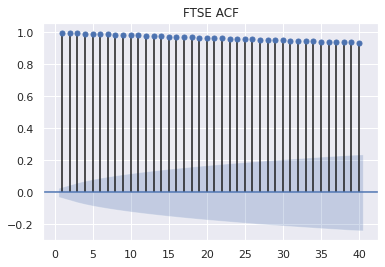

In [5]:
sgt.plot_acf(df.market_value, lags = 40 , zero=False)
plt.title('FTSE ACF')
plt.show()

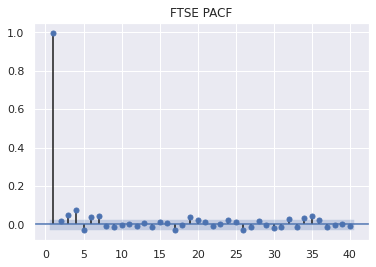

In [6]:
sgt.plot_pacf(df.market_value, lags = 40 , zero=False, method = 'ols')
plt.title('FTSE PACF')
plt.show()

#Modeling

In [7]:
model_ar = ARMA(df.market_value , order =(1,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [8]:
results_ar = model_ar.fit()

In [9]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 14 Nov 2022   AIC                          55251.196
Time:                        07:18:38   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5055.8541    485.798     10.407      0.000    4103.707    6008.001
ar.L1.market_value     0.9985      0.001   1298.620      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
model_ar2 = ARMA(df.market_value , order =(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 14 Nov 2022   AIC                          55251.742
Time:                        07:18:39   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.717     10.267      0.000    4118.054    6061.228
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4633           +0.0000j           58.4633            0.5000
-----------------------------------------------------------------------------
"""

In [11]:

model_ar3 = ARMA(df.market_value , order =(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 14 Nov 2022   AIC                          55241.742
Time:                        07:18:39   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.379      9.781      0.000    4069.718    6109.565
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [12]:
model_ar6 = ARMA(df.market_value , order =(6,0))
results_ar6 = model_ar6.fit()
results_ar6.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Mon, 14 Nov 2022   AIC                          55208.947
Time:                        07:18:41   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.225      9.005      0.000    3981.821    6197.462
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value    -0.0333      0.020     -1.687      0.092      -0.072       0.005
ar.L3.market_value    -0.0223      0.020     -1.134      0.257      -0.061       0.016
ar.L4.market_value     0.1029      0.020      5.227      0.000       0.064       0.141
ar.L5.market_value    -0.0682      0.020     -3.454      0.001      -0.107      -0.029
ar.L6.market_value     0.0393      0.014      2.785      0.005       0.012       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2           -1.6828           -0.0000j            1.6828           -0.5000
AR.3           -0.3031           -1.8985j            1.9226           -0.2752
AR.4           -0.3031           +1.8985j            1.9226            0.2752
AR.5            1.5114           -1.3426j            2.0216           -0.1156
AR.6            1.5114           +1.3426j            2.0216            0.1156
-----------------------------------------------------------------------------
"""

In [13]:
model_ar7 = ARMA(df.market_value , order =(7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 14 Nov 2022   AIC                          55201.799
Time:                        07:18:46   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    589.591      8.632      0.000    3934.064    6245.218
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1038      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.385      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.026      0.002       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9296j            1.6228           -0.0971
AR.3            1.3301           +0.9296j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7612           -0.6517j            1.8779           -0.4436
AR.7           -1.7612           +0.6517j            1.8779            0.4436
-----------------------------------------------------------------------------
"""

In [14]:
model_ar8 = ARMA(df.market_value , order =(8,0))
results_ar8 = model_ar8.fit()
results_ar8.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Mon, 14 Nov 2022   AIC                          55203.478
Time:                        07:18:51   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    585.036      8.700      0.000    3942.992    6236.291
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value    -0.0304      0.020     -1.541      0.123      -0.069       0.008
ar.L3.market_value    -0.0272      0.020     -1.379      0.168      -0.066       0.011
ar.L4.market_value     0.1047      0.020      5.306      0.000       0.066       0.143
ar.L5.market_value    -0.0670      0.020     -3.396      0.001      -0.106      -0.028
ar.L6.market_value    -0.0028      0.020     -0.139      0.889      -0.041       0.036
ar.L7.market_value     0.0505      0.020      2.559      0.010       0.012       0.089
ar.L8.market_value    -0.0080      0.014     -0.567      0.571      -0.036       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.6223           -0.6323j            1.7412           -0.4409
AR.3           -1.6223           +0.6323j            1.7412            0.4409
AR.4           -0.0911           -1.5626j            1.5653           -0.2593
AR.5           -0.0911           +1.5626j            1.5653            0.2593
AR.6            1.3256           -1.0019j            1.6616           -0.1030
AR.7            1.3256           +1.0019j            1.6616            0.1030
AR.8            6.0864           -0.0000j            6.0864           -0.0000
-----------------------------------------------------------------------------
"""

#LLR-Test

In [15]:
def LLR_test(mod1,mod2,DF=1):
   L1 = mod1.fit().llf
   L2 = mod2.fit().llf
   LR = (2*(L2-L1))
   p = chi2.sf(LR,DF).round(3)
   return p

In [16]:
LLR_test(model_ar,model_ar2)

0.228

In [17]:
LLR_test(model_ar,model_ar7)

0.0

In [18]:
LLR_test(model_ar2,model_ar3)

0.001

In [19]:
LLR_test(model_ar6,model_ar7)

0.002

In [20]:
LLR_test(model_ar7,model_ar8)

0.571

In [21]:
LLR_test(model_ar,model_ar7,DF=6)

0.0

#Analysing Residuals

In [22]:
df['res_prices'] = results_ar7.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,market_value,res_prices
date,,
1994-01-07,3445.98,-1643.661276
1994-01-10,3440.58,-7.790600
1994-01-11,3413.77,-29.260088
1994-01-12,3372.02,-44.778304
1994-01-13,3360.01,-16.827897


In [24]:
df.res_prices.mean()

0.35224490869050273

In [25]:
df.res_prices.var()

4005.944693901041

In [26]:
sts.adfuller(df.res_prices)

(-76.07470704091206,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.415134854804)

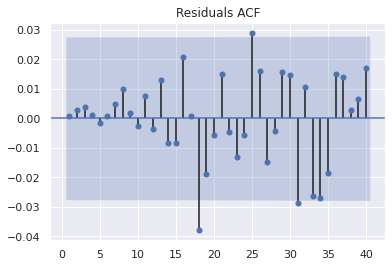

In [27]:
sgt.plot_acf(df.res_prices, lags = 40 , zero=False)
plt.title('Residuals ACF')
plt.show()

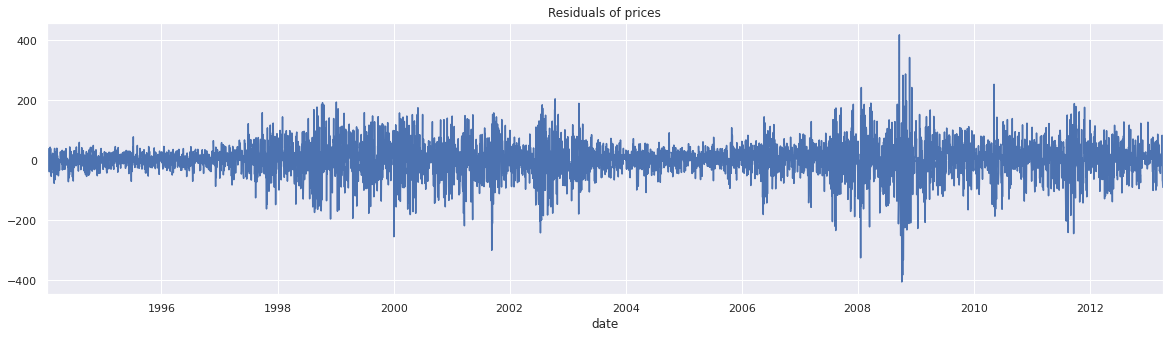

In [30]:
df.res_prices[1:].plot(figsize=(20,5))
plt.title('Residuals of prices')
plt.show()